In [6]:
# pip install nilearn within 
import nilearn as nib

import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import nibabel as nib
import seaborn as sns
import numpy as np
import glob

from nilearn.plotting import plot_surf, plot_surf_contours

# nilearn import (later in the code)
import os
os.chdir("/scratch/a/arisvoin/iismail")

current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: /gpfs/fs0/scratch/a/arisvoin/iismail


In [10]:
#Convert vectorized into sorted matrix.
def visvec(cwin,netlabels):
    
    #Format.
    corrmat = pd.DataFrame(cwin)
    
    #Add a column for the labels.
    rowlabelled = pd.concat([pd.Series(netlabels),pd.DataFrame(corrmat)],axis=1)
    
    #Add a row for the labels.
    colnetlabels = [0] + netlabels
    rowlabelled.loc[-1] = colnetlabels
    rowlabelled.index = rowlabelled.index + 1
    collabelled = rowlabelled.sort_index()
    collabelled.columns = range(361)
    
    #Adds axes labels to enable reference.
    collabelled = collabelled.rename_axis('Index')
    collabelled = collabelled.rename_axis('Columns',axis='columns')
    
    #Sort the rows and columns.w
    rowsort = collabelled.sort_values(by=[0,'Index'],axis=0)
    colsort = rowsort.sort_values(by=[0,'Columns'],axis=1)
    
    #Reset indices. Save the matrix to list.
    reformatted = colsort.reset_index(drop=True)
    reformatted.columns = range(reformatted.shape[1])
    return reformatted


#Read in network labels and convert them to integers.
with open('colenetlabels.txt') as f:
    netlabels = [label.rstrip() for label in f] 
netlabels = list(map(int,netlabels))
print(netlabels)



[1, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 6, 2, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 8, 4, 6, 10, 10, 7, 9, 9, 9, 9, 9, 9, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4, 5, 3, 2, 2, 5, 3, 3, 3, 3, 3, 3, 4, 7, 4, 4, 9, 7, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 7, 6, 9, 7, 4, 6, 7, 7, 4, 7, 4, 7, 4, 9, 9, 7, 9, 7, 7, 7, 9, 5, 5, 7, 7, 4, 3, 3, 3, 8, 3, 4, 4, 8, 4, 4, 12, 7, 12, 4, 4, 3, 5, 5, 9, 9, 9, 1, 11, 6, 8, 6, 9, 5, 9, 6, 9, 9, 9, 7, 9, 11, 5, 5, 2, 6, 10, 10, 1, 5, 7, 7, 5, 4, 4, 7, 9, 9, 2, 2, 2, 9, 2, 2, 2, 2, 2, 9, 7, 2, 9, 9, 12, 4, 3, 4, 7, 7, 6, 8, 8, 8, 9, 7, 4, 4, 4, 1, 2, 2, 2, 2, 2, 2, 3, 3, 4, 5, 6, 2, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 8, 6, 6, 10, 6, 7, 9, 9, 9, 9, 9, 9, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4, 5, 3, 2, 2, 5, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 9, 9, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 6, 6, 9, 7, 4, 6, 7, 6, 7, 7, 4, 7, 4, 9, 9, 7, 9, 7, 7, 9, 9, 5, 5, 7, 7, 4, 3, 3, 3, 8, 8, 4, 4, 8, 4, 4, 12, 7, 12, 4, 4, 3, 5, 5, 9, 9, 9, 1, 11, 6, 8, 6, 9, 5, 6, 6, 9, 9, 9, 7, 9, 11, 5, 5, 2, 6, 10, 10, 1, 5, 7, 7, 5, 4, 4,

NameError: name 'knum' is not defined

/gpfs/fs0/scratch/a/arisvoin/iismail/pythonimports/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in arctanh


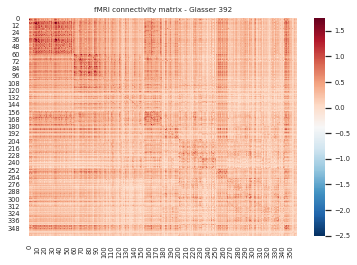

In [26]:
# RETRIVEING FILES''
files = sorted(glob.glob("/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/861456/demean_rfMRI*.csv", recursive = True))
#print(files)

#the for loop creating the connectivity matrices
list_of_matrices=[]
for i in files:
    
   # ptseries_glasser392_file = i
  #  glasser_ptseries_nib = nib.load(ptseries_glasser392_file)
    #print(glasser_ptseries_nib.get_fdata().shape) -> testing
    
    ## creating the correlation matrix using pandas
  #  ts_data = glasser_ptseries_nib.get_fdata()
 #   ts_df = pd.DataFrame(glasser_ptseries_nib.get_fdata(), columns=schaefer400_parcels)
    ts_df=pd.read_csv(i,header=None)
    #glasser392_corZ_pd = np.arctanh(ts_df.T.corr())


    ts_cor_df = ts_df.T.corr()  ## you can just call corr() on the pandas dataframe to get a correlation matrix
    ts_corZ_df = np.arctanh(ts_cor_df) ## the Fisher's r-to-z transform - we usually do this before stats
    #print(ts_corZ_df)
    reformatted = visvec(ts_corZ_df,netlabels)
  #  print(reformatted.iloc[1:,1:].values)
    list_of_matrices.append(reformatted.iloc[1:,1:].values)

matrices_array = np.array(list_of_matrices) #creates an array that stores all the matrices
#print(matrices_array)
averaged_array = np.array(matrices_array).mean(axis=0) #averages the matrices here
if len(averaged_array.shape) != 2:
    averaged_array = np.atleast_2d(averaged_array)
#print(averaged_array)

# Create the named matrix
matrix_861456 = averaged_array

plt1 = sns.heatmap(averaged_array, vmin=-2.5, vmax=1.75, cmap="RdBu_r")
plt1.set_title("fMRI connectivity matrix - Glasser 392")
plt.show() 




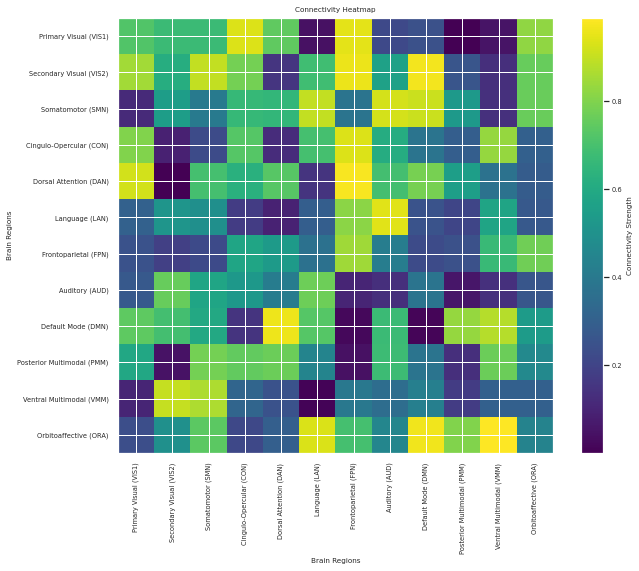

In [27]:
# Example connectivity matrix
matrix_861456 = np.random.rand(12, 12)  # Assuming a 12x12 matrix

# Example network labels
namelist = ['Primary Visual (VIS1)', 'Secondary Visual (VIS2)', 'Somatomotor (SMN)', 'Cingulo-Opercular (CON)',
            'Dorsal Attention (DAN)', 'Language (LAN)', 'Frontoparietal (FPN)', 'Auditory (AUD)', 'Default Mode (DMN)',
            'Posterior Multimodal (PMM)', 'Ventral Multimodal (VMM)', 'Orbitoaffective (ORA)']

# Create heatmap
plt.figure(figsize=(10, 8))
plt.imshow(matrix_861456, cmap='viridis', interpolation='nearest')

# Add labels
plt.xticks(np.arange(len(namelist)), namelist, rotation=90)
plt.yticks(np.arange(len(namelist)), namelist)

# Add color bar
plt.colorbar(label='Connectivity Strength')

# Add title and labels
plt.title('Connectivity Heatmap')
plt.xlabel('Brain Regions')
plt.ylabel('Brain Regions')

plt.show()

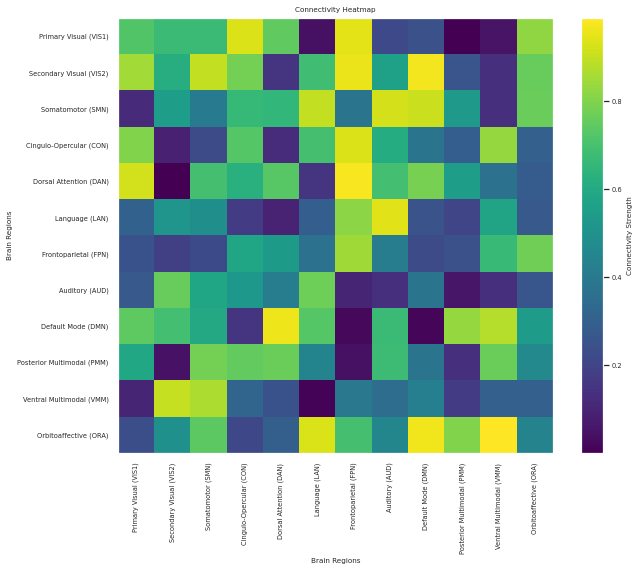

In [28]:
# Example connectivity matrix
matrix_all = np.random.rand(12, 12)  # Assuming a 12x12 matrix

# Example network labels
namelist = ['Primary Visual (VIS1)', 'Secondary Visual (VIS2)', 'Somatomotor (SMN)', 'Cingulo-Opercular (CON)',
            'Dorsal Attention (DAN)', 'Language (LAN)', 'Frontoparietal (FPN)', 'Auditory (AUD)', 'Default Mode (DMN)',
            'Posterior Multimodal (PMM)', 'Ventral Multimodal (VMM)', 'Orbitoaffective (ORA)']

# Create figure and subplot
plt.figure(figsize=(10, 8))
plt.imshow(matrix_861456, cmap='viridis', interpolation='nearest')

# Add labels
plt.xticks(np.arange(len(namelist)), namelist, rotation=90)
plt.yticks(np.arange(len(namelist)), namelist)

# Add color bar
plt.colorbar(label='Connectivity Strength')

# Add title and labels
plt.title('Connectivity Heatmap')
plt.xlabel('Brain Regions')
plt.ylabel('Brain Regions')

# Ensure grid lines are visible
plt.grid(which='both', color='k', linestyle='-', linewidth=1)



In [ ]:
# Function to visualize vectorized connectivity matrix
def visvec(cwin, netlabels):
    corrmat = pd.DataFrame(cwin)
    rowlabelled = pd.concat([pd.Series(netlabels), pd.DataFrame(corrmat)], axis=1)
    colnetlabels = [0] + netlabels
    rowlabelled.loc[-1] = colnetlabels
    rowlabelled.index = rowlabelled.index + 1
    collabelled = rowlabelled.sort_index()
    collabelled.columns = range(361)
    collabelled = collabelled.rename_axis('Index')
    collabelled = collabelled.rename_axis('Columns', axis='columns')
    rowsort = collabelled.sort_values(by=[0, 'Index'], axis=0)
    colsort = rowsort.sort_values(by=[0, 'Columns'], axis=1)
    reformatted = colsort.reset_index(drop=True)
    reformatted.columns = range(reformatted.shape[1])
    return reformatted

def create_labels(netlabels, namelist):
    labels = []
    for label in netlabels:
        labels.append(namelist[label - 1])  # Adjusting index since network labels start from 1
    return labels

# Read network labels and convert them to integers
with open('colenetlabels.txt') as f:
    netlabels = [int(label.rstrip()) for label in f]

# Define the names of brain regions
namelist = ['Primary Visual (VIS1)', 'Secondary Visual (VIS2)',
            'Somatomotor (SMN)', 'Cingulo-Opercular (CON)',
            'Dorsal Attention (DAN)', 'Language (LAN)',
            'Frontoparietal (FPN)', 'Auditory (AUD)', 'Default Mode (DMN)',
            'Posterior Multimodal (PMM)', 'Ventral Multimodal (VMM)',
            'Orbitoaffective (ORA)']

# Retrieve files
files = sorted(glob.glob("/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/861456/demean_rfMRI*.csv", recursive=True))

# Loop through files and create connectivity matrices
list_of_matrices = []
for i in files:
    ts_df = pd.read_csv(i, header=None)
    ts_cor_df = ts_df.T.corr()
    ts_corZ_df = np.arctanh(ts_cor_df)
    reformatted = visvec(ts_corZ_df, netlabels)
    list_of_matrices.append(reformatted.iloc[1:, 1:].values)

# Average the matrices
matrices_array = np.array(list_of_matrices)
averaged_array = np.array(matrices_array).mean(axis=0)
if len(averaged_array.shape) != 2:
    averaged_array = np.atleast_2d(averaged_array)

# Create the named matrix
matrix_861456 = averaged_array

# Create variable labels for rows and columns
row_labels = create_labels(netlabels, namelist)
col_labels = create_labels(netlabels, namelist)

# Plot the heatmap with variable labels
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_861456, vmin=-2.5, vmax=1.75, cmap="RdBu_r", annot=True, fmt='.2f', xticklabels=row_labels, yticklabels=col_labels)
plt.title("fMRI connectivity matrix - Glasser 392")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


/gpfs/fs0/scratch/a/arisvoin/iismail/pythonimports/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in arctanh
